# Linear Regression
#### UD2. Aprendizaxe Supervisada
#### MP. Sistemas de Aprendizaxe Automáticos
#### IES de Teis (Vigo), Cristina Gómez Alonso

En estadística, **la regresión lineal es un enfoque lineal para modelar la relación entre una variable dependiente escalar y y una o más variables explicativas (o variables independientes) denominadas X**. El caso de una variable explicativa se denomina **regresión lineal simple o univariable**. Para más de una variable explicativa, el proceso se denomina **regresión lineal múltiple**.
Los modelos de regresión lineal a menudo se ajustan/entrenan utilizando la aproximación de mínimos cuadrados, pero también se pueden ajustar de otras maneras, como minimizando la "falta de ajuste" en alguna otra norma (como en la regresión de mínimas desviaciones absolutas), o minimizando una penalización de la función de pérdida por mínimos cuadrados como en la ridge regression y lasso.
Tener en cuenta, que la aproximación de mínimos cuadrados se puede utilizar para ajustar modelos que no sean modelos lineales. Así, aunque los términos “mínimos cuadrados” y “modelo lineal” están estrechamente vinculados, no son sinónimos.
En este notebook volveremos a utilizar el notebook de estimación de precios que vimos en el notebook de Exploratory Data Analysis. Tenéis todos los detalles en  la web de [kaggle](https://www.kaggle.com/camnugent/california-housing-prices)

## 1. Importación de paquetes y dataset

In [11]:
# Estas son las bibliotecas necesarias para la manipulación de datos en el ejercicio
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar los datos, fichero “housing.csv”
df = pd.read_csv("housing.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


## 2. EDA y Visual EDA

In [ ]:
# Visualización preliminar de los datos. Mostrar las primeras filas del dataframe
df.head()

In [ ]:
# Comprobar la información del dataframe cargado
df.info()

In [ ]:
# Comprobar si existen valores nulos o faltan
df.isnull().sum()

In [ ]:
# Primera aproximación estadística de los datos de que disponemos
# Visualiza los parámetros estadíscos tipo de cada columna del dataframe:
# - Número de datos
# - Madia
# - Desviación estándar
# - Valor máximo
# - Valor mínimo
# - Percentiles
df.describe(percentiles=[0.1,0.25,0.5,0.75,0.9])

In [ ]:
# Listar columnas del dataframe

df.columns

In [ ]:
#Mostrar gráficamente relaciones entre columnas numéricas
sns.pairplot(df)

In [ ]:
df['median_house_value'].plot.hist(bins=25,figsize=(8,4))

In [ ]:
df['median_house_value'].plot.density()

In [ ]:
df.corr()

In [ ]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot=True,linewidths=2)

## 3. Preprocessing

In [ ]:
# Estrategias de acción ante posibles valores nulos o NaN
# (1) Eliminarlos del conjunto de datos
# (2) Rellenar esos valores con el valor medio del resto de valores de la columna
# (3) Rellenar esos valores con el valor más común en la columna (moda)
# (4) Otra estrategia en función del conocimiento del negocio, bbdd, etc.

# En este caso, vamos a elegir la estrategia (1)
# Vamos rellenar los valores no existentes con al valor medio de su columna
df['total_bedrooms'].fillna(df['total_bedrooms'].mean())

In [ ]:
# Tratamiento de las variables categóricas
# Convertir las variables categóricas a numéricas
# Si solo es una columna:
from sklearn.preprocessing import LabelEncoder
class_label_encoder = LabelEncoder()
df['ocean_proximity'] = class_label_encoder.fit_transform(df['ocean_proximity'].values)
# Si tenemos múltiples columnas, haríamos:
from sklearn.preprocessing import LabelEncoder
df=df.apply(LabelEncoder().fit_transform)
df.head()

## 4. División del dataset

Ponemos todas las características numéricas en X y el precio(median_house_value) en y.

In [ ]:
# Separar las variables (X) y las etiquetas (y) del conjunto de datos
X = df.iloc[:, :-1].values
# Separar la etiqueta (y) median_house_value
y = df.iloc[:, [-1]].values
print("Feature set size:",X.shape)
print("Variable set size:",y.shape)


In [ ]:
#Otra alternativa equivalente a lo anterior si no queremos utilizar iloc también podemos acceder por columnas
#l_column = list(df.columns) # Making a list out of column names
#len_feature = len(l_column) # Length of column vector list
#l_column
#X = df[l_column[0:len_feature-1]]
#y = df[l_column[len_feature-1]]
#print("Feature set size:",X.shape)
#print("Variable set size:",y.shape)
#X.head()
#y.head()

Dividimos el dataset en 4 grupos:

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Verificamos las divisiones train/test (deben estar en la proporción según el parámetro test_size anterior)

In [ ]:
print("Training feature set size:",X_train.shape)
print("Test feature set size:",X_test.shape)
print("Training variable set size:",y_train.shape)
print("Test variable set size:",y_test.shape)

## 5. Estandarización de los datos

In [ ]:
# La estandarización de los datos es importante, como parte del preproceso
# y limpieza de los y antes de haber sido usados en la elaboración del modelo.
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
y_train = scaler.fit_transform(y_train)
y_test = scaler.transform(y_test)

## 6. Creación del modelo Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

## 7. Entrenamiento

In [ ]:
lm.fit(X_train,y_train)

In [ ]:
print("The intercept term of the linear model:", lm.intercept_)

In [ ]:
print("The coefficients of the linear model:", lm.coef_)

In [ ]:
#cdf = pd.DataFrame(data=lm.coef_, index=X_train.columns, columns=["Coefficients"])
#cdf

## 8. Predicción

In [ ]:
# Realizamos una predicción con el modelo de regresión lineal
predictions = lm.predict(X_test)
print ("Type of the predicted object:", type(predictions))
print ("Size of the predicted object:", predictions.shape)

## 9. Cálculo de errores

In [ ]:
#En la regresión linel nos fijaremos principalmente en el MSE Error Cuadrático Medio
# Calcular el error cometido en la predicción mediante el uso de la raiz del error cuadrático medio


from sklearn.metrics import mean_squared_error

mseLinear = metrics.mean_squared_error(y_test,predictions)
print('Error Cuadrático Medio (MSE) para el modelo de regresión linear = %.5f' % mseLinear)

In [ ]:
#También podemos mostrar otros errores
from sklearn import metrics
print("Mean absolute error (MAE):", metrics.mean_absolute_error(y_test,predictions))
print("Mean square error (MSE):", metrics.mean_squared_error(y_test,predictions))
print("Root mean square error (RMSE):", np.sqrt(metrics.mean_squared_error(y_test,predictions)))
print("R-squared value of predictions:",round(metrics.r2_score(y_test,predictions),3))

## 10. Gráfico de puntos del precio predicho y el y_test

In [ ]:
plt.figure(figsize=(10,7))
plt.title("Actual vs. predicted house prices",fontsize=25)
plt.xlabel("Actual test set house prices",fontsize=18)
plt.ylabel("Predicted house prices", fontsize=18)
plt.scatter(x=y_test,y=predictions)

## 11. Regresión Lineal Univariable

In [ ]:
#Regresión lineal solo con la variable median_income

X_train_median_income = X_train[: , [7]]
X_test_median_income = X_test[: , [7]]

# Construye un modelo de regresión lineal usando esta vez median_income como
# variable independiente.
from sklearn.linear_model import LinearRegression
linearRegression2 = LinearRegression()

# Entrenar el modelo anterior
linearRegression2.fit(X_train_median_income, y_train)
# Realiza la predicción con el modelo anterior
predictionLinear2 = linearRegression2.predict(X_test_median_income)


mseLinear2 = mean_squared_error(y_test, predictionLinear2)

print(' Raíz del Error Cuadrático Medio (RMSE) para el modelo de regresión linear = %.5f' % mseLinear2)

plt.scatter(X_train_median_income, y_train, color = 'green')
# X = X_train_median_income
# Y = linearRegression2.predict(X_train_median_income)
plt.plot (X_train_median_income, linearRegression2.predict(X_train_median_income), color = 'red')

plt.title ('Resultados entrenamiento - Ingreso medio / Valor medio de la vivienda')
plt.xlabel('Ingreso medio')
plt.ylabel('Valor medio vivienda')
plt.show()

### *Ejercicio: Alturas*

Con el dataset heights.csv (altura de padres e hijos):

1. Crea un dataframe de pandas con la información del dataset.

In [ ]:
# Estas son las bibliotecas necesarias para la manipulación de datos en el ejercicio
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar los datos, fichero “heights.csv”
df = pd.read_csv("heights.csv")


2. Muestra la información del dataset y un gráfico que relacione ambos datos.

In [3]:
df = pd.read_csv("heights.csv")
df.head()

,Father,Son
0,165.100,151.892
1,160.782,160.528
2,165.100,160.782
3,167.132,159.512
4,155.194,163.322


In [4]:
# Comprobar la información del dataframe cargado
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1078 entries, 0 to 1077
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Father  1078 non-null   float64
 1   Son     1078 non-null   float64
dtypes: float64(2)
memory usage: 17.0 KB


# Comprobar si existen valores nulos o faltan


In [5]:
# Comprobar si existen valores nulos o faltan
df.isnull().sum()

Father    0
Son       0
dtype: int64

# Primera aproximación estadística de los datos de que disponemos
# Visualiza los parámetros estadíscos tipo de cada columna del dataframe:
# - Número de datos
# - Madia
# - Desviación estándar
# - Valor máximo
# - Valor mínimo
# - Percentiles

In [6]:
df.describe(percentiles=[0.1,0.25,0.5,0.75,0.9])

,Father,Son
count,1078.000000,1078.000000
mean,171.924542,174.457944
std,6.974401,7.153133
min,149.860000,148.590000
10%,163.322000,165.608000
25%,167.132000,169.926000
50%,172.212000,174.244000
75%,176.784000,179.070000
90%,181.102000,183.464200
max,191.516000,199.136000


In [8]:
# Listar columnas del dataframe

df.columns

Index(['Father', 'Son'], dtype='object')

#Mostrar gráficamente relaciones entre columnas numéricas

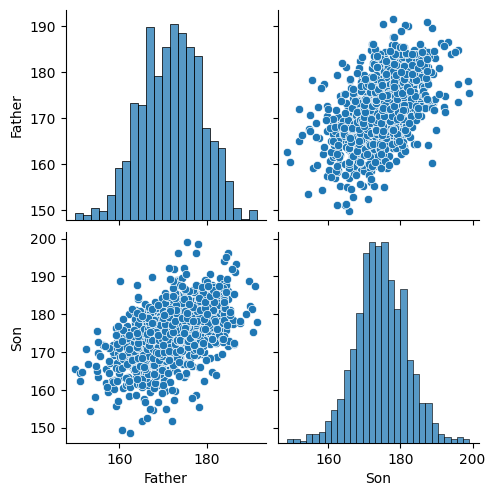

In [9]:

sns.pairplot(df)

In [10]:
df['median_heights_value'].plot.density()

KeyError: 'median_heights_value'

3. Separa el dataframe en 4 grupos: X_train (característica de entrenamiento: altura de los padres), X_test (característica de test, 30% de las filas), y_train(etiqueta de entrenamiento: altura de los hijos), y_test(etiqueta de test).

4. Muestra el número de registros de cada grupo (entrenamiento y test)

5. Entrena un modelo de regresión lineal con sklearn y muestra los coeficientes (constante y pendiente).

6. MUestra un gráfico con los puntos y la recta de regresión.

7. Muestra las métricas de los datos de entrenamiento.

8. Calcula las predicciones de los datos de test y muestra los valores de las diferentes métricas.

# Webgrafia


[Curso de Cesar Guirò](https://cesguiro.es/doku.php?id=clase:ia:saa:start)
[Curso de Luz Frías](https://github.com/koldLight/curso-python-analisis-datos)
[Curso de Tirtjakupto Sarkar](https://github.com/tirthajyoti/Machine-Learning-with-Python)
[DataCamp](https://www.datacamp.com/)


# Licencia

[Attributon-ShacerAlike 4.0 International](https://creativecommons.org/licenses/by-sa/4.0/)

Puedes utilizar libremente este material, con las siguientes condiciones:

* Atribuir la autoría a este documento.
* Si lo utilizas y haces cambios, deberás liberarlo también bajo la misma licencia.